# Transformações geométricas - APS de Visão

## 

## Criação da imagem

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [1]:
import matplotlib.pyplot as plt

from matplotlib import colors

import cv2
import math

import numpy as np
from sympy import *

from sympy.solvers.solveset import linsolve

%matplotlib inline


sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

In [2]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [3]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [4]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [5]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position)
    cv2.circle(blank,point_position, point_size, point_color, -1)


Posição dos pontos: (x_entrada, y_entrada)
(30, 30)
(150, 30)
(30, 90)
(90, 90)
(150, 90)
(30, 150)
(150, 150)


## Imagem de entrada

Tudo o que foi geito até agora teve como única finalidade gerar esta imagem, que será gravada no arquivo `dots_pattern.png` .

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


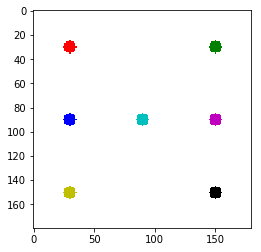

In [6]:
cv2.imwrite("dots_pattern.png", blank)
plt.imshow(blank)

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

In [7]:
saida = cv2.imread("patterns_transformed.png")

saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

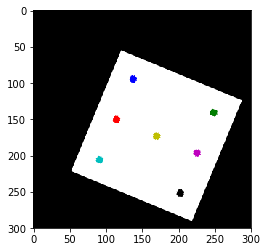

In [14]:
plt.imshow(saida_rgb)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


O objetivo desta seção é só entender a forma da transformação de saída expressa na equação que fecha a seção anterior.

Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# APS Visão

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?
R: 4. Scale Angulo, traslacoes em xt e yt.

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída. R: Entrada (30, 30),(150, 30),(30, 90),(90, 90),(150, 90),(30, 150),(150, 150). Saida: (135,95),(248,141),(114,150),(170,173),(225,196),(91,206),(203,252)

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz? R:2 

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior? R: maior precisao

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima (faça até este item pelo menos).

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo. (OPCIONAL)

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* (OPCIONAL)

9. Abra a imagem `patterns_transformed.png`  na tela do seu celular e imprima na tela em tempo real a rotação da imagem lendo da webcam com USB (SUPER OPCIONAL)

## Referências



[Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)

[http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)



In [9]:
angle = math.atan(30/30)
angletodegrees = math.degrees(angle)
angle2 = math.atan(95/135)
angletodegrees2 = math.degrees(angle2)

theta = angletodegrees - angletodegrees2
thetainradians = math.radians(theta)
print(thetainradians)

0.785398163397


In [10]:
math.cos(thetainradians)

0.7071067811865476


| Entrada  | Saida    |
|----------|----------|
|  (X,Y)   |  (X,Y)   |
| (30,30)  | (135,95) |
| (150,30) | (248,141)|
| (30,90)  | (114,150)|
| (90,90)  | (170,173)|
| (150,90) | (225,196)|
| (30,150) | (91,206) |
| (150,150)| (203,252)|

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

#Sistemas
135=30*s*math.cos(thetainradians)-30*s*math.sin(thetainradians)+xt
248=150*s*math.cos(thetainradians)-30*s*math.sin(thetainradians)+xt
95=-30*s*math.sin(thetainradians)-30*s*math.cos(thetainradians)+yt
141=-150*s*math.sin(thetainradians)-30*s*math.cos(thetainradians)+yt

114=30*s*math.cos(thetainradians)-90*s*math.sin(thetainradians)+xt
170=90*s*math.cos(thetainradians)-90*s*math.sin(thetainradians)+xt
150=-30*s*math.sin(thetainradians)-90*s*math.cos(thetainradians)+yt
173=-90*s*math.sin(thetainradians)-90*s*math.cos(thetainradians)+yt

225=150*s*math.cos(thetainradians)-90*s*math.sin(thetainradians)+xt
91=30*s*math.cos(thetainradians)-150*s*math.sin(thetainradians)+xt
196=-150*s*math.sin(thetainradians)-90*s*math.cos(thetainradians)+yt
206=-30*s*math.sin(thetainradians)-150*s*math.cos(thetainradians)+yt


In [11]:
x, y = symbols('x, y')

In [15]:
entradax_1 = 30 #azul
entraday_1 = 30
entradax_2 = 150 # verde
entraday_2 = 30

entradax_3 = 30  #vermelho
entraday_3 = 90
entradax_4 = 150 #roxo
entraday_4 = 90

saidax_1 = 137 #azul
saiday_1 = 95
saidax_2 = 250 #verde
saiday_2 = 140

saidax_3 = 115 #vermelho
saiday_3 = 150
saidax_4 = 225 # roxo
saiday_4 = 196


x1 = linsolve([entradax_1*x*math.cos(thetainradians)-entraday_1*x*math.sin(thetainradians)+y-saidax_1, entradax_2*x*math.cos(thetainradians)-entraday_2*x*math.sin(thetainradians)+y-saidax_2], (x, y))
y1 = linsolve([-entradax_1*x*math.sin(thetainradians)-entraday_1*x*math.cos(thetainradians)+y-saiday_1,-entradax_2*x*math.sin(thetainradians)-entraday_2*x*math.cos(thetainradians)+y-saiday_2], (x, y))
x2 = linsolve([entradax_3*x*math.cos(thetainradians)-entraday_3*x*math.sin(thetainradians)+y-saidax_3, entradax_4*x*math.cos(thetainradians)-entraday_4*x*math.sin(thetainradians)+y-saidax_4], (x, y))
y2 = linsolve([-entradax_3*x*math.sin(thetainradians)-entraday_3*x*math.cos(thetainradians)+y-saiday_3,-entradax_4*x*math.sin(thetainradians)-entraday_4*x*math.cos(thetainradians)+y-saiday_4], (x, y))



In [39]:
print("tentativa 1")
print("{0}  ->:    Scale1,Xt_1".format(x1))
print("{0}  ->:    Scale2,Yt_1".format(y1))
print("{0}  ->:    Scale3,Xt_2".format(x2))
print("{0}  ->:    Scale4,Yt_2".format(y1))

tentativa 1
{(0, 137.0)}  ->:    Scale1,Xt_1
{(-0.53033008588991, 72.5)}  ->:    Scale2,Yt_1
{(1.29636243217534, 170.0)}  ->:    Scale3,Xt_2
{(-0.53033008588991, 72.5)}  ->:    Scale4,Yt_2


In [40]:
print("tentativa 2")
x,y,z = symbols('x, y, z')

sol = linsolve([entradax_1*x*math.cos(thetainradians)-entraday_1*x*math.sin(thetainradians)+y-saidax_1, entradax_2*x*math.cos(thetainradians)-entraday_2*x*math.sin(thetainradians)+y-saidax_2,-entradax_1*x*math.sin(thetainradians)-entraday_1*x*math.cos(thetainradians)+z-saiday_1], (x, y, z))

print("{0}  ->:    Scale,Xt,Yt".format(sol))

tentativa 2
{(0, 137.0, 0)}  ->:    Scale,Xt,Yt
